In [0]:
from google.colab import files

In [85]:
files.upload()

Saving Nifty50.csv to Nifty50.csv


{'Nifty50.csv': b'Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)\n15-May-2017,9433.55,9449.25,9423.1,9445.4,145163953,7790.97\n16-May-2017,9461,9517.2,9456.35,9512.25,171709433,9209.89\n17-May-2017,9517.6,9532.6,9486.1,9525.75,211856040,10726.23\n18-May-2017,9453.2,9489.1,9418.1,9429.45,199340647,10782.46\n19-May-2017,9469.9,9505.75,9390.75,9427.9,259861396,11544.77\n22-May-2017,9480.25,9498.65,9427.9,9438.25,202874757,9432.97\n23-May-2017,9445.05,9448.05,9370,9386.15,231345629,11553.27\n24-May-2017,9410.9,9431.9,9341.65,9360.55,218265181,11045.95\n25-May-2017,9384.05,9523.3,9379.2,9509.75,298147347,16964.26\n26-May-2017,9507.75,9604.9,9495.4,9595.1,225647631,11204.36\n29-May-2017,9560.05,9637.75,9547.7,9604.9,242266034,12484.61\n30-May-2017,9590.65,9635.3,9581.2,9624.55,199894193,9765.4\n31-May-2017,9636.55,9649.6,9609.25,9621.25,427053433,19605.94\n01-Jun-2017,9603.55,9634.65,9589.9,9616.1,181533283,9482.61\n02-Jun-2017,9657.15,9673.5,9637.45,9653.5,167195027,8564.3\n05-Jun

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("MRPL.csv")

In [0]:
data.head()

Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0   MRPL     EQ  ...          524064                   28.08
1   MRPL     EQ  ...          322721                   36.18
2   MRPL     EQ  ...         1760745                   42.86
3   MRPL     EQ  ...         2073114                   20.11
4   MRPL     EQ  ...          660925                   30.77

[5 rows x 15 columns]

In [7]:
data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

In [0]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [10]:
data.head()

Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0   MRPL     EQ  ...          524064                   28.08
1   MRPL     EQ  ...          322721                   36.18
2   MRPL     EQ  ...         1760745                   42.86
3   MRPL     EQ  ...         2073114                   20.11
4   MRPL     EQ  ...          660925                   30.77

[5 rows x 15 columns]

In [0]:
register_matplotlib_converters()
sns.set()

(array([736511., 736603., 736695., 736785., 736876., 736968., 737060.,
        737150.]), <a list of 8 Text xticklabel objects>)

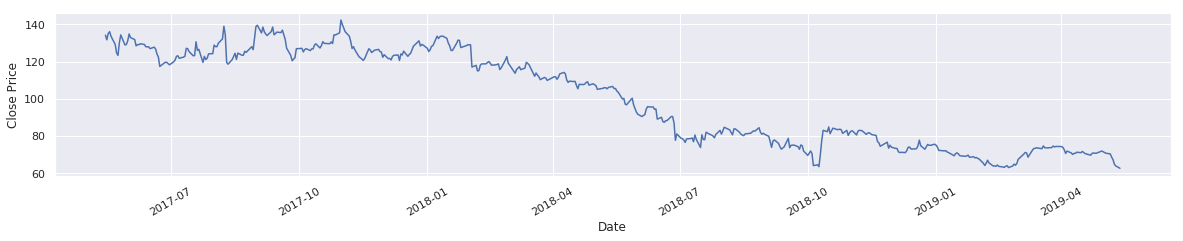

In [13]:
plt.rcParams["figure.figsize"] = (20,3)
ax=sns.lineplot(data['Date'],data['Close Price'],markers=True)
plt.xticks(rotation=30)

In [0]:
data['Day_Perc_Change']=data['Close Price'].pct_change()

In [0]:
data.drop(data.index[0],inplace=True)

In [16]:
data.head()

Symbol Series  ... % Dly Qt to Traded Qty  Day_Perc_Change
1   MRPL     EQ  ...                  36.18        -0.018629
2   MRPL     EQ  ...                  42.86         0.025816
3   MRPL     EQ  ...                  20.11         0.007402
4   MRPL     EQ  ...                  30.77        -0.018369
5   MRPL     EQ  ...                  39.71        -0.032560

[5 rows x 16 columns]

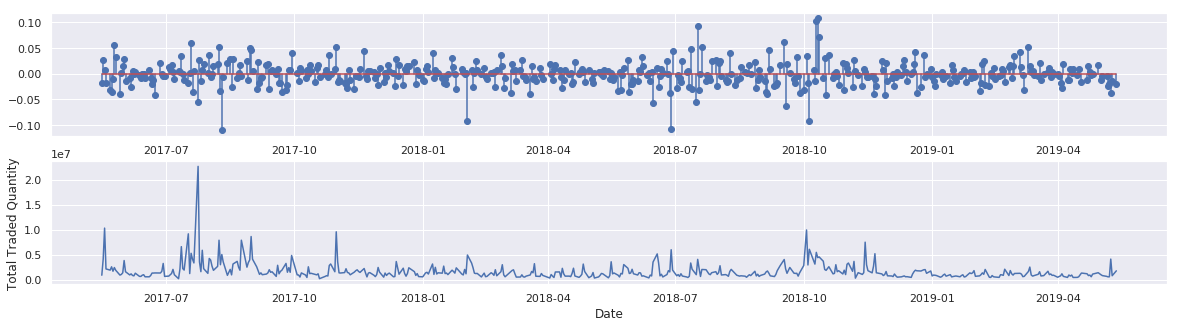

In [17]:
plt.rcParams["figure.figsize"]=(20,5)
fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].stem(data['Date'],data['Day_Perc_Change'])
axs[1]=sns.lineplot(data['Date'],data['Total Traded Quantity'],markers=True)

It is observeable that the volume of trade is dependent on the % change in the price. Whenever the Close price of a day is less than previous day, we see a great amount of volumne purchased that day. And vice vera when the % change is +ve and high.

In [0]:
data.loc[(data['Day_Perc_Change']>=-0.5) & (data['Day_Perc_Change']<0.5),'Trend']='Slight or No change'
data.loc[(data['Day_Perc_Change']>=0.5) & (data['Day_Perc_Change']<1),'Trend']='Slight positive'
data.loc[(data['Day_Perc_Change']>=-1) & (data['Day_Perc_Change']<-0.5),'Trend']='Slight negative'
data.loc[(data['Day_Perc_Change']>=1) & (data['Day_Perc_Change']<3),'Trend']='Positive'
data.loc[(data['Day_Perc_Change']>=-3) & (data['Day_Perc_Change']<-1),'Trend']='Negative'
data.loc[(data['Day_Perc_Change']>=3) & (data['Day_Perc_Change']<7),'Trend']='Among top gainers'
data.loc[(data['Day_Perc_Change']>=-7) & (data['Day_Perc_Change']<-3),'Trend']='Among top losers'
data.loc[(data['Day_Perc_Change']>7),'Trend']='Bull run'
data.loc[(data['Day_Perc_Change']<-7) ,'Trend']='Bear drop'

In [0]:
grouped_data=data.groupby(by='Trend')

In [21]:
for key,val in grouped_data:
  print (key)

Slight or No change


## Calculating daily return


In [0]:
data['Daily_Return']=(data['Open Price']-data['Close Price'])/data['Total Traded Quantity']

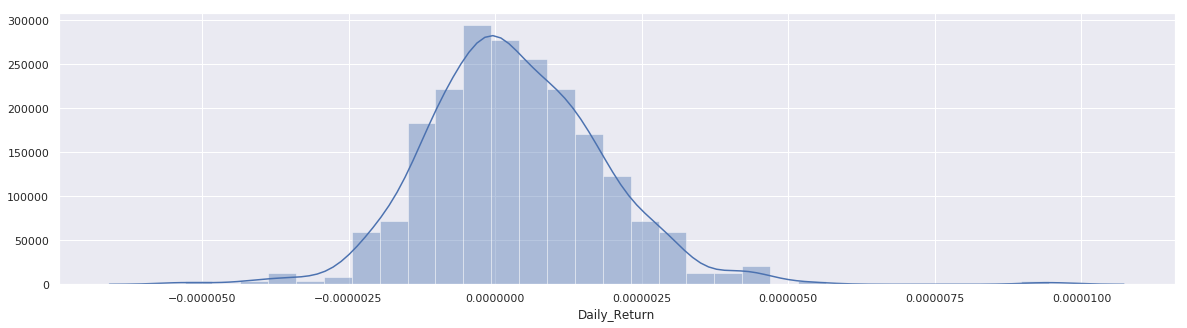

In [23]:
sns.distplot(data['Daily_Return'])

## Loading 5 different data

In [0]:
data_Gold=pd.read_csv("GOLD.csv")
data_Adani=pd.read_csv("ADANIPORTS.csv")
data_Hindunilvr=pd.read_csv("HINDUNILVR.csv")
data_welspunind=pd.read_csv("WELSPUNIND.csv")
data_Pnb=pd.read_csv("PNB.csv")

In [0]:
cols={'Gold':data_Gold['Price'],'Adani':data_Adani['Close Price'],'Hindulvr':data_Hindunilvr['Close Price'],'Welspun':data_welspunind['Close Price'],'Pnb':data_Pnb['Close Price']}

In [0]:
data_closing=pd.DataFrame(cols)

In [32]:
data_closing.head()

Gold   Adani  Hindulvr  Welspun     Pnb
0  28060  356.20    983.25    90.25  166.80
1  28184  354.50   1000.40    90.65  174.15
2  28119  348.55   1009.40    88.85  165.05
3  27981  347.90    990.25    86.90  158.50
4  28007  349.45   1008.00    85.05  155.20

In [0]:
cols_new={'Gold':data_Gold['Price'].pct_change(),'Adani':data_Adani['Close Price'].pct_change(),'Hindulvr':data_Hindunilvr['Close Price'].pct_change(),'Welspun':data_welspunind['Close Price'].pct_change(),'Pnb':data_Pnb['Close Price'].pct_change()}

In [0]:
data_pctChange=pd.DataFrame(cols_new)

In [35]:
data_pctChange.head()

Gold     Adani  Hindulvr   Welspun       Pnb
0       NaN       NaN       NaN       NaN       NaN
1  0.004419 -0.004773  0.017442  0.004432  0.044065
2 -0.002306 -0.016784  0.008996 -0.019857 -0.052254
3 -0.004908 -0.001865 -0.018972 -0.021947 -0.039685
4  0.000929  0.004455  0.017925 -0.021289 -0.020820

In [0]:
data_pctChange.drop(data_pctChange.index[0],inplace=True)


In [0]:
from pandas.plotting import scatter_matrix

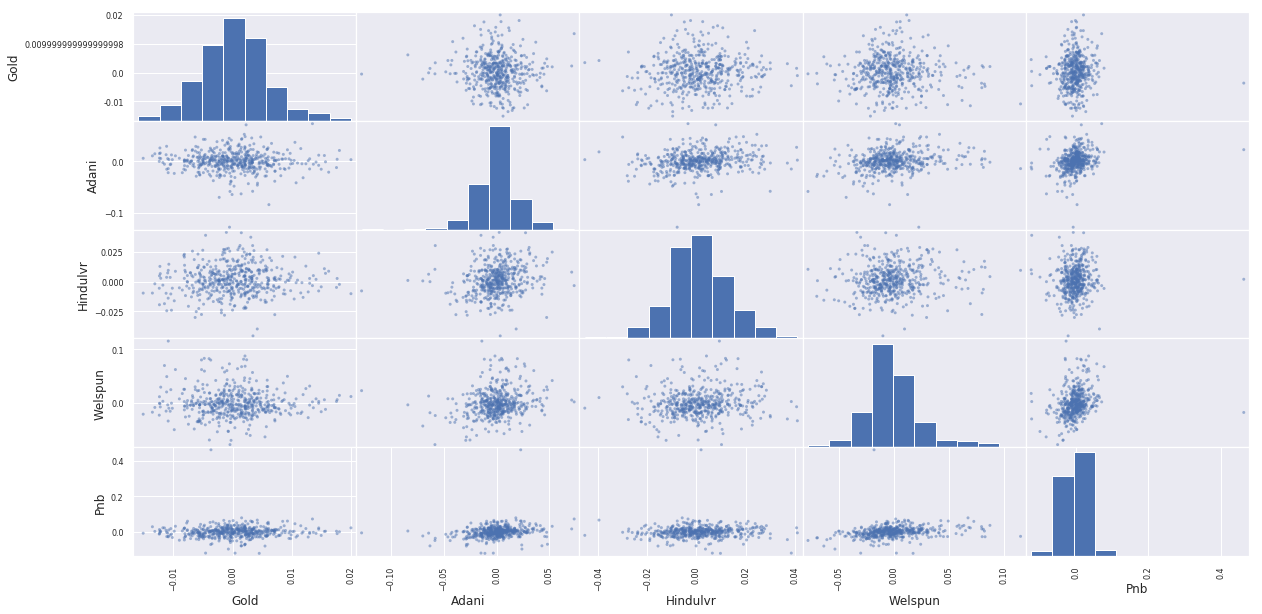

In [81]:
plt.rcParams['figure.figsize']=(20,10)
scatter_matrix(data_pctChange)
plt.show()

In [0]:
def calc_volatility(pct_df):
  rollingdata=pct_df.rolling(7).sum()[6:]
  rollingdata=list(rollingdata)
  rollingdataavg=[]
  i=0
  while(i<len(rollingdata)):
    rollingdataavg.append(sum(rollingdata[i:i+7])/7)
    i+=7
  rollingdata_mean_diff=[]
  ctr=0
  for i in range(0,len(rollingdataavg)):
    rollingdata_mean_diff.append(list((np.array(rollingdata[ctr:ctr+7])-rollingdataavg[i])**2))
    ctr+=7
  volatility=[]
  for i in range(0,len(rollingdata_mean_diff)):
    volatility.append(sum(rollingdata_mean_diff[i])/7)
  return(volatility)

In [0]:
volatility=calc_volatility(data_pctChange['Gold'])
xval=[i for i in range (0,len(volatility))]

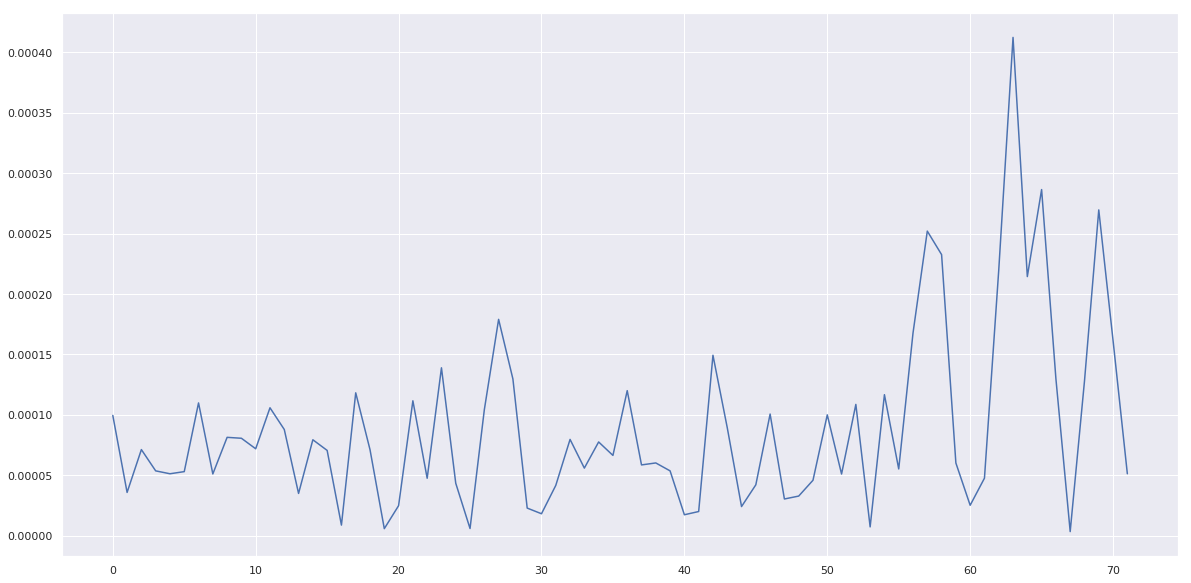

In [84]:
sns.lineplot(xval,volatility)

## Comparision with nifty data

In [0]:
data_nifty=pd.read_csv('Nifty50.csv')

In [0]:
# data_nifty.head()
data_niftyPCT=data_nifty['Close'].pct_change()

In [0]:
volatility_nifty=calc_volatility(data_niftyPCT)
xval_nifty=[i for i in range (0,len(volatility_nifty))]

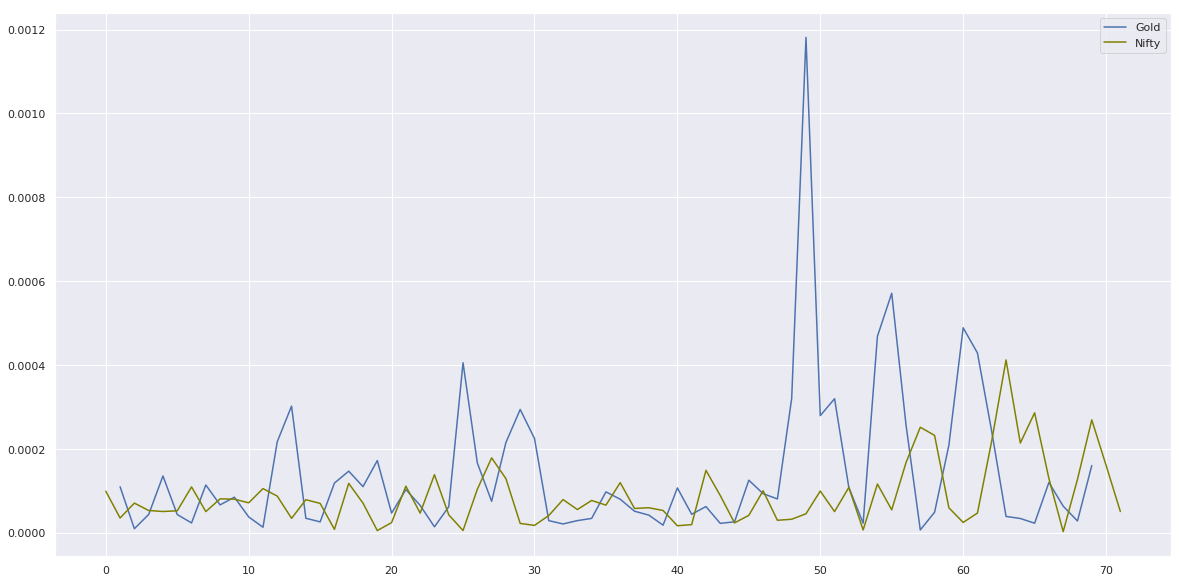

In [99]:

plt.plot(xval_nifty,volatility_nifty,label='Gold')
plt.plot(xval,volatility,color='olive',label='Nifty')
plt.legend()

In [100]:
data.head()

Symbol Series       Date  ...  Day_Perc_Change                Trend  Daily_Return
1   MRPL     EQ 2017-05-16  ...        -0.018629  Slight or No change  1.681667e-06
2   MRPL     EQ 2017-05-17  ...         0.025816  Slight or No change -9.372507e-07
3   MRPL     EQ 2017-05-18  ...         0.007402  Slight or No change  3.491933e-07
4   MRPL     EQ 2017-05-19  ...        -0.018369  Slight or No change  2.513716e-06
5   MRPL     EQ 2017-05-22  ...        -0.032560  Slight or No change  2.929419e-06

[5 rows x 18 columns]

## SMA's

In [0]:
LL={'Close Price':data['Close Price'].rolling(window=21).mean()}
SS={'Close Price':data['Close Price'].rolling(window=34).mean()}

In [0]:
long_rolling=pd.DataFrame(LL)
short_rolling=pd.DataFrame(SS)

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            483, 484, 485, 486, 487, 488, 489, 490, 491, 492],
           dtype='int64', length=491)

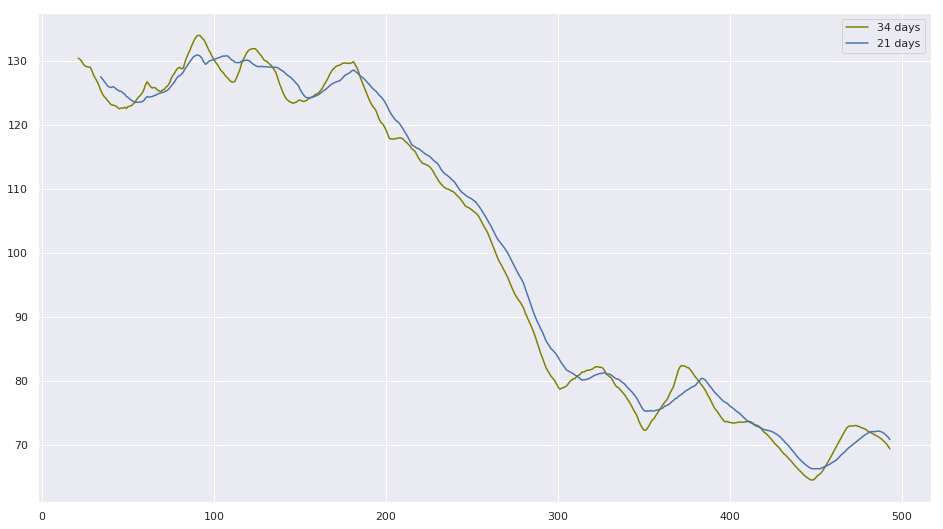

In [131]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(long_rolling['Close Price'],label='34 days',color='olive')
ax.plot(short_rolling['Close Price'],label='21 days')
plt.legend()

In [0]:
data['14 Day MA'] = data['Close Price'].rolling(window=14).mean()
data['14 Day STD'] = data['Close Price'].rolling(window=14).std()

In [0]:
data['Upper Band'] = data['14 Day MA'] + (data['14 Day STD'] * 2)
data['Lower Band'] = data['14 Day MA'] - (data['14 Day STD'] * 2)

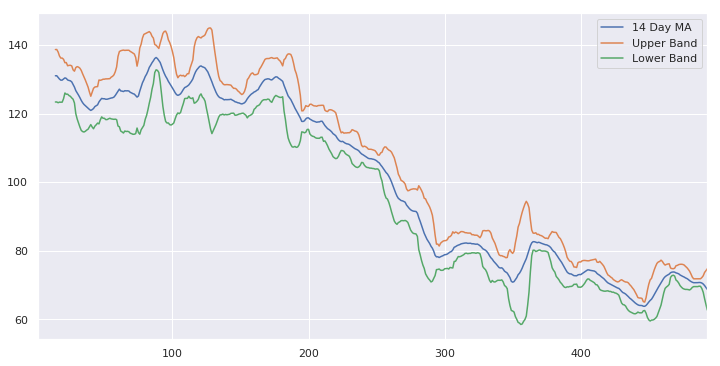

In [136]:
data[['14 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.show();